In [2]:
f= open('/content/friends101.txt')

In [3]:
script101=f.read()

In [5]:
import re
import os

char = re.compile(r'[A-Z][a-z]+:')

In [6]:
re.findall(char,script101)

['Note:',
 'Scene:',
 'Monica:',
 'Joey:',
 'Chandler:',
 'Phoebe:',
 'Phoebe:',
 'Monica:',
 'Chandler:',
 'Chandler:',
 'All:',
 'Chandler:',
 'Joey:',
 'Chandler:',
 'Joey:',
 'Phoebe:',
 'Chandler:',
 'Monica:',
 'Chandler:',
 'Ross:',
 'Joey:',
 'Monica:',
 'Ross:',
 'Chandler:',
 'Monica:',
 'Joey:',
 'Monica:',
 'Ross:',
 'Phoebe:',
 'Ross:',
 'Phoebe:',
 'Ross:',
 'Monica:',
 'Ross:',
 'Joey:',
 'Ross:',
 'Chandler:',
 'Ross:',
 'Monica:',
 'Ross:',
 'Joey:',
 'Joey:',
 'Ross:',
 'Chandler:',
 'Monica:',
 'Rachel:',
 'Waitress:',
 'Monica:',
 'Rachel:',
 'Ross:',
 'Monica:',
 'Rachel:',
 'Monica:',
 'Rachel:',
 'Scene:',
 'Monica:',
 'Chandler:',
 'Ross:',
 'Rachel:',
 'Phoebe:',
 'Chandler:',
 'Joey:',
 'Joey:',
 'Rachel:',
 'Ross:',
 'Rachel:',
 'Monica:',
 'Rachel:',
 'Monica:',
 'Phoebe:',
 'Rachel:',
 'Phoebe:',
 'Monica:',
 'Joey:',
 'Monica:',
 'Joey:',
 'Chandler:',
 'Paul:',
 'Monica:',
 'Joey:',
 'Ross:',
 'Monica:',
 'Joey:',
 'Ross:',
 'Monica:',
 'Chandler:',
 'Mon

In [13]:
ABSET = set(re.findall(char,script101))

In [15]:
ABSET1=list(ABSET)

character=[]

for i in ABSET1:
  character +=[i[:-1]]

del character[0]
del character[-1]

character

['Rachel',
 'Waitress',
 'Frannie',
 'Monica',
 'All',
 'Scene',
 'Chandler',
 'Joey',
 'Paul',
 'Phoebe',
 'Ross']

Wordcloud
1. Data 불러오는 부분
2. 전처리 부분
3. 명사 및 형용사 추출
4. 빈도추출
5. 워드클라우드 시각화

In [16]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 129824 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [39]:
#font manager 확인하는 작업
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()

for f in sys_font:
  if 'Nanum' in f:
    print(f)

/usr/share/fonts/truetype/nanum/NanumBarunGothic-YetHangul.ttf
/usr/share/fonts/truetype/nanum/NanumSquare_acL.ttf
/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf
/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf
/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf
/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
/usr/share/fonts/truetype/nanum/NanumSquareR.ttf
/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf
/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf
/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf
/usr/share/fonts/truetype/nanum/NanumSquareL.ttf
/usr/share/fonts/truetype/nanum/NanumSquareB.ttf
/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf
/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
/usr/share/fonts/truetype/nanum/NanumSquare_acEB.ttf
/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
/usr/share/fonts/truetype/nanum/Na

In [40]:
#import packages
import pandas as pd
train = pd.read_csv('/content/train_set_env.csv')

In [41]:
train

,id,label,text
0,3357,16,[울진 농업용 미생물 75t 연중 무료 공급]많이 본 기사
1,7485,0,[[오늘 날씨] '경칩' 영하권 꽃샘추위… 일부 지역서 눈발]체감온도가 -12도까지...
2,7434,2,"""[""""봄철 미세먼지·꽃가루로 지친 피부는 산소발생기 '오투덤 산소테라피'로""""]산..."
3,7516,0,['파란하늘 반가워']성동훈 기자 전국 대부분 미세먼지 농도가 좋음 을 나타내...
4,7517,0,[[오늘의 날씨] 전국 구름 많고 포근…미세먼지는 '나쁨']사진 연합뉴스 오늘은...
...,...,...,...
5067,10612,10,"""[오산시,취약한 해빙기 맞아 4월 말까지 수질관리 특별점검]오산시는 수질오염사고에..."
5068,10612,12,"""[오산시,취약한 해빙기 맞아 4월 말까지 수질관리 특별점검]오산시는 수질오염사고에..."
5069,10613,16,"""[美제재 불구…화웨이, 지난해 매출 148조원 '19.1% 급증']화웨이가 미국 ..."
5070,10617,16,[[신년사] 차준택 인천부평구청장]존경하는 구민 여러분! 그리고 친애하는 직원 여...


In [42]:
#데이터 전처리 방법(null/na 값들을 제거)
datas = train[['text']]

In [43]:
datas

,text
0,[울진 농업용 미생물 75t 연중 무료 공급]많이 본 기사
1,[[오늘 날씨] '경칩' 영하권 꽃샘추위… 일부 지역서 눈발]체감온도가 -12도까지...
2,"""[""""봄철 미세먼지·꽃가루로 지친 피부는 산소발생기 '오투덤 산소테라피'로""""]산..."
3,['파란하늘 반가워']성동훈 기자 전국 대부분 미세먼지 농도가 좋음 을 나타내...
4,[[오늘의 날씨] 전국 구름 많고 포근…미세먼지는 '나쁨']사진 연합뉴스 오늘은...
...,...
5067,"""[오산시,취약한 해빙기 맞아 4월 말까지 수질관리 특별점검]오산시는 수질오염사고에..."
5068,"""[오산시,취약한 해빙기 맞아 4월 말까지 수질관리 특별점검]오산시는 수질오염사고에..."
5069,"""[美제재 불구…화웨이, 지난해 매출 148조원 '19.1% 급증']화웨이가 미국 ..."
5070,[[신년사] 차준택 인천부평구청장]존경하는 구민 여러분! 그리고 친애하는 직원 여...


In [44]:
datas.drop_duplicates()

,text
0,[울진 농업용 미생물 75t 연중 무료 공급]많이 본 기사
1,[[오늘 날씨] '경칩' 영하권 꽃샘추위… 일부 지역서 눈발]체감온도가 -12도까지...
2,"""[""""봄철 미세먼지·꽃가루로 지친 피부는 산소발생기 '오투덤 산소테라피'로""""]산..."
3,['파란하늘 반가워']성동훈 기자 전국 대부분 미세먼지 농도가 좋음 을 나타내...
4,[[오늘의 날씨] 전국 구름 많고 포근…미세먼지는 '나쁨']사진 연합뉴스 오늘은...
...,...
5066,"""[부여군, 친환경 굿뜨래농산물 생산 주력]농기센터 EM복합균 등 유용미생물 10..."
5067,"""[오산시,취약한 해빙기 맞아 4월 말까지 수질관리 특별점검]오산시는 수질오염사고에..."
5069,"""[美제재 불구…화웨이, 지난해 매출 148조원 '19.1% 급증']화웨이가 미국 ..."
5070,[[신년사] 차준택 인천부평구청장]존경하는 구민 여러분! 그리고 친애하는 직원 여...


In [45]:
#데이터 프레임 형태를 리스트 형태로 변환

data = datas.text.values.tolist()

In [46]:
data

['[울진 농업용 미생물 75t 연중 무료 공급]많이 본 기사',
 "[[오늘 날씨] '경칩' 영하권 꽃샘추위… 일부 지역서 눈발]체감온도가 -12도까지 떨어진 18일 오전 서울 종로구 광화문 네거리에서 두꺼운 외투를 입은 시민들이 발걸음을 재촉하고 있다    개구리가 겨울잠에서 깨어난다는  경칩 이자 목요일인 5일은 반짝 꽃샘추위가 찾아오겠다.    기상청에 따르면 이날 북서쪽에서 찬 공기가 남하하면서 아침 최저기온이 대부분 지역에서 영하로 내려가 춥고  낮 기온은 일사에 의해 오르며 일교차가 크겠다.    아침 기온은 －6∼2도  낮 기온은 6∼12도로 평년보다 낮겠다. 특히 바람까지 불면서 아침 체감온도는 －11∼－2도로 더 낮겠다. 다만 낮이 되면 햇볕 때문에 기온이 5∼12도까지 오르겠다.    기압골의 영향으로 중부지방은 밤까지 눈이 내리고 일부 남부지방에도 곳에 따라 눈이 날리는 곳이 있겠다.    예상 적설량은 강원 산지에 1∼5㎝  강원 영서  충남 서해안  전라 서해안  전북 동부 내륙 등에 1㎝ 내외다.    미세먼지 농도는 전 권역에서  보통  수준으로 예상된다. 다만 전날 유입된 국외 미세먼지 영향으로 강원권과 대구·경북은 오전에 일시적으로  나쁨  수준을 보이겠다고 국립환경과학원은 내다봤다.",
 '"[""봄철 미세먼지·꽃가루로 지친 피부는 산소발생기 \'오투덤 산소테라피\'로""]산소발생기 기업 트리시스의 오투덤이 봄철 불청객 미세먼지와 계절에 변화로 날리는꽃가루로 트러블이 많아지는 시기에 산소테라피로 도움을 받을 수 있다고 전했다.  오투덤을 이용한 테라피는 PSAT 방식의 특수한 성분의 흡착필터를 통해 공기 중에 질소는 흡착되고  순수하게 여과된 산소만을 사용할 수 있기 때문에 피부 미용에 효과적이라는 것이 업체 측 설명이다. 이때 함께 발생하는 음이온이 피부의 호흡을 통해 체내에 공급돼 피부노화의 원인인 활성 산소를 환원시키고 피부 세포 재생을 유도하는 역할을 한다.  미세먼지로 인한 피부 트러블이 발생되면 오투덤의 고농도 산소

In [48]:
#data가 작업데이터

import re
regex = []

for i in range(len(data)):
  text = re.sub('[^0-9ㄱ-힣]', ' ', str(data[i]))
  text = re.sub(' +', ' ', text)
  regex.append(text)


In [19]:
# 명사 추출을 위해 konlpy설치
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 26.8 MB/s eta 0:00:00


In [49]:
from konlpy.tag import Okt
okt=Okt()

In [50]:
len(regex)

5072

In [51]:
regex[2:5]

[' 봄철 미세먼지 꽃가루로 지친 피부는 산소발생기 오투덤 산소테라피 로 산소발생기 기업 트리시스의 오투덤이 봄철 불청객 미세먼지와 계절에 변화로 날리는꽃가루로 트러블이 많아지는 시기에 산소테라피로 도움을 받을 수 있다고 전했다 오투덤을 이용한 테라피는 방식의 특수한 성분의 흡착필터를 통해 공기 중에 질소는 흡착되고 순수하게 여과된 산소만을 사용할 수 있기 때문에 피부 미용에 효과적이라는 것이 업체 측 설명이다 이때 함께 발생하는 음이온이 피부의 호흡을 통해 체내에 공급돼 피부노화의 원인인 활성 산소를 환원시키고 피부 세포 재생을 유도하는 역할을 한다 미세먼지로 인한 피부 트러블이 발생되면 오투덤의 고농도 산소 이온과 함께 전용 솔루션세트와 같이 케어를 통해 지친 피부에 활력을 불어넣어주고 보습 및 미백효과도 얻을 수 있다 여기에 산소발생기 오투덤을 활용한 다양한 접근으로 피부 관리의 도움 받는 좋은 방법이기도 하다 현재 세계 10여개국으로 오투덤을 수출을 하고 있는 트리시스의 관계자는 봄철뿐 아니라 실외 활동 후 소중한 피부에 긍정적인 영향을 줄 수 있다 고 설명했다 저작권자 데이터넷 무단전재 및 재배포 금지 ',
 ' 파란하늘 반가워 성동훈 기자 전국 대부분 미세먼지 농도가 좋음 을 나타내고 있는 27일 오후 서울 영등포구 63스퀘어에서 바라본 하늘이 파랗게 보이고 있다 2020 2 27 뉴스1 ',
 ' 오늘의 날씨 전국 구름 많고 포근 미세먼지는 나쁨 사진 연합뉴스 오늘은 전국에 구름이 많은 가운데 평년보다 포근한 날씨가 이어지고 미세먼지 농도가 나쁨 을 보이겠다 기상청은 이날 아침 최저기온은 8 3도 낮 최고기온은 3 11도 분포를 보이겠다고 밝혔다 지역별 아침 최저기온은 서울 3도 인천 2도 춘천 5도 강릉 1도 대전 3도 대구 0도 부산 2도 전주 2도 광주 1도 제주 10도 낮 최고기온은 서울 5도 인천 3도 춘천 5도 강릉 8도 대전 8도 대구 9도 부산 11도 전주 7도 광주 9도 제주 10도로 예상된다 미세먼지는 대부분의 지역에서 나쁨 을 

In [52]:
test=[]
test.append(okt.nouns(regex[2]))
#패키지마다 갖고 있는 특징이 달라, 거기에 맞춰 작업을 하다보니 호환성 감소

In [53]:
noun=[]
for j in range(len(regex)):
  noun.append(okt.nouns(regex[j]))
  print(str(j)+"번째 수행중")

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
72번째 수행중
73번째 수행중
74번째 수행중
75번째 수행중
76번째 수행중
77번째 수행중
78번째 수행중
79번째 수행중
80번째 수행중
81번째 수행중
82번째 수행중
83번째 수행중
84번째 수행중
85번째 수행중
86번째 수행중
87번째 수행중
88번째 수행중
89번째 수행중
90번째 수행중
91번째 수행중
92번째 수행중
93번째 수행중
94번째 수행중
95번째 수행중
96번째 수행중
97번째 수행중
98번째 수행중
99번째 수행중
100번째 수행중
101번째 수행중
102번째 수행중
103번째 수행중
104번째 수행중
105번째 수행중
106번째 수행중
107번째 수행중
108번째 수행중
109번째 수행중
110번째 수행중
111번째 수행중
112번째 수행중
113번째 수행중
114번째 수행중
115번째 수행중
116번째 수행중
117번째 수행중
118번째 수행중
119번째 수행중
120번째 수행중
121번째 수행중
122번째 수행중
123번째 수행중
124번째 수행중
125번째 수행중
126번째 수행중
127번째 수행중
128번째 수행중
129번째 수행중
130번째 수행중
131번째 수행중
132번째 수행중
133번째 수행중
134번째 수행중
135번째 수행중
136번째 수행중
137번째 수행중
138번째 수행중
139번째 수행중
140번째 수행중
141번째 수행중
142번째 수행중
143번째 수행중
144번째 수행중
145번째 수행중
146번째 수행중
147번째 수행중
148번째 수행중
149번째 수행중
150번째 수행중
151번째 수행중
152번째 수행중
153번째 수행중
154번째 수행중
155번째 수행중
156번째 수행중
157번째 수행중
158번째 수행중
159번째 수행중
160번째 수행중
161번째 수행중
162번째 수행중
163번째 수행중
164번째 수행중
165번째 수행중
166번째 수행중
167번째 수행중
168번째 수행중
169번째 수행중
170번째 수행중
17

In [55]:
#collections라는 패키지를 통해 빈도 추출
from collections import Counter

#리스트 안에 리스트 구조를 한개의 리스트로 만들어줘야 함
nouns = sum(noun,[])

count = Counter(nouns)

In [56]:
noun_top = count.most_common(100)
noun_top

[('등', 19625),
 ('것', 13811),
 ('수', 12866),
 ('사업', 11505),
 ('지역', 8803),
 ('및', 8715),
 ('환경', 8246),
 ('이', 7196),
 ('위해', 6728),
 ('위', 6287),
 ('고', 5365),
 ('관리', 5329),
 ('계획', 5326),
 ('시설', 5137),
 ('추진', 4999),
 ('지원', 4971),
 ('통해', 4632),
 ('개', 4334),
 ('기술', 4261),
 ('말', 4213),
 ('대한', 4150),
 ('물', 3715),
 ('그', 3692),
 ('주민', 3402),
 ('개발', 3376),
 ('재', 3336),
 ('전', 3303),
 ('한국', 3253),
 ('산업', 3232),
 ('중', 3220),
 ('농업', 3211),
 ('발생', 3130),
 ('올해', 3090),
 ('조성', 3028),
 ('기자', 3011),
 ('정책', 2989),
 ('시', 2971),
 ('도시', 2963),
 ('시민', 2907),
 ('운영', 2896),
 ('사용', 2823),
 ('개선', 2798),
 ('안전', 2723),
 ('지난해', 2704),
 ('세계', 2673),
 ('곳', 2668),
 ('를', 2657),
 ('우리', 2620),
 ('제', 2613),
 ('센터', 2610),
 ('생태', 2535),
 ('교육', 2513),
 ('지난', 2498),
 ('더', 2486),
 ('명', 2472),
 ('이번', 2465),
 ('사회', 2400),
 ('조사', 2375),
 ('의', 2352),
 ('며', 2335),
 ('확대', 2333),
 ('도', 2308),
 ('진행', 2304),
 ('관련', 2269),
 ('생산', 2251),
 ('활용', 2247),
 ('기업', 2228),
 ('문화', 2217)

In [57]:
#python에서 워드클라우드 패키지 사용
!pip install wordcloud

In [60]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic-YetHangul.ttf',
               background_color='white',
               width=1000,
               height=1000,
               max_words=50,
               max_font_size=300)

In [61]:
dictionary = dict(noun_top)
wordcloud = wc.generate_from_frequencies(dictionary)

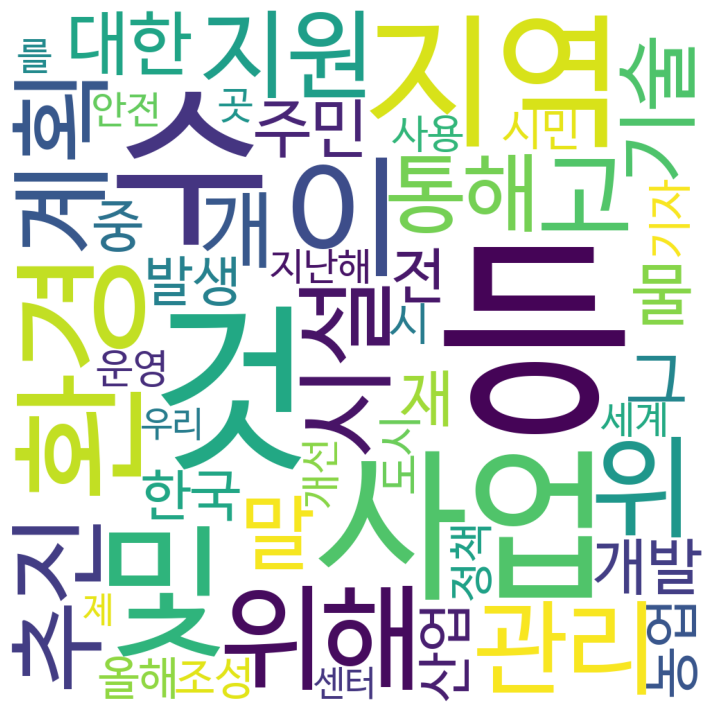

In [62]:
plt.figure(figsize=(10,9))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()